# Proyecto Salud Mental y Tasas de Suicidios 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import statsmodels.api as sms
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## Modelo

In [2]:
df_suicide = pd.read_csv("./world-suicide/master.csv")
df_suicide = df_suicide.drop(['country-year', 'HDI for year'], axis=1)
df_suicide

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [3]:
df_suicide.rename(columns={
    'suicides/100k pop': 'Suicides',
    'country': 'Country',
    'year': 'Year',
    ' gdp_for_year ($) ': 'GDP_Year',
    'gdp_per_capita ($)': 'GDP_Capita'}, 
    inplace=True)
df_suicide

,Country,Year,sex,age,suicides_no,population,Suicides,GDP_Year,GDP_Capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [4]:
country_rate = df_suicide.groupby('Country').Suicides.mean().reset_index()

In [5]:
country_gdp_cap = df_suicide.groupby('Country').GDP_Capita.mean().reset_index()

In [6]:
new_suicide = pd.merge(country_rate, country_gdp_cap, on='Country')
new_suicide["GDP_Capita"] = new_suicide["GDP_Capita"]/10000
new_suicide

,Country,Suicides,GDP_Capita
0,Albania,3.502879,0.185905
1,Antigua and Barbuda,0.552901,1.044819
2,Argentina,10.469328,0.791410
3,Armenia,3.275872,0.187392
4,Aruba,9.503095,2.422164
...,...,...,...
96,United Arab Emirates,1.317917,4.216200
97,United Kingdom,7.502473,3.190835
98,United States,13.819812,3.926961
99,Uruguay,19.461190,0.762207


In [7]:
df_happiness = pd.read_csv('./world-happiness/master.csv')
df_happiness

,Year,Country,Region,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Happiness Score,Happiness Rank
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587,1
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561,2
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527,3
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522,4
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427,5
...,...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380,151
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334,152
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231,153
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203,154


In [8]:
df_happiness.rename(columns={
    "Happiness Rank": "Rank",
    "Happiness Score": "Score",
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health",
    "Trust (Government Corruption)": "Trust"
},inplace=True)
del df_happiness["Rank"]
df_happiness

,Year,Country,Region,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,2015,Switzerland,Western Europe,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,7.587
1,2015,Iceland,Western Europe,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,7.561
2,2015,Denmark,Western Europe,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,7.527
3,2015,Norway,Western Europe,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,7.522
4,2015,Canada,North America,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,7.427
...,...,...,...,...,...,...,...,...,...,...
760,2019,Yemen,Middle East and Northern Africa,0.28700,1.16300,0.46300,0.14300,0.07700,0.10800,3.380
761,2019,Rwanda,Sub-Saharan Africa,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,3.334
762,2019,Tanzania,Sub-Saharan Africa,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,3.231
763,2019,Afghanistan,Southern Asia,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,3.203


In [9]:
economy = df_happiness.groupby('Country').Economy.mean().reset_index()

In [10]:
family = df_happiness.groupby('Country').Family.mean().reset_index()

In [11]:
health = df_happiness.groupby('Country').Health.mean().reset_index()

In [12]:
freedom = df_happiness.groupby('Country').Freedom.mean().reset_index()

In [13]:
trust = df_happiness.groupby('Country').Trust.mean().reset_index()

In [14]:
generosity = df_happiness.groupby('Country').Generosity.mean().reset_index()

In [15]:
score = df_happiness.groupby('Country').Score.mean().reset_index()

In [16]:
new_happiness = pd.merge(economy, family, on='Country')
new_happiness = pd.merge(new_happiness, health, on='Country')
new_happiness = pd.merge(new_happiness, freedom, on='Country')
new_happiness = pd.merge(new_happiness, trust, on='Country')
new_happiness = pd.merge(new_happiness, generosity, on='Country')
new_happiness = pd.merge(new_happiness, score, on='Country')
new_happiness

,Country,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,Afghanistan,0.357113,0.409753,0.254707,0.117924,0.058094,0.267730,3.51280
1,Albania,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.71260
2,Algeria,1.012963,1.074205,0.665057,0.178437,0.146099,0.069219,5.66760
3,Angola,0.798380,0.938368,0.133902,0.027433,0.071570,0.105269,3.87225
4,Argentina,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.45940
...,...,...,...,...,...,...,...,...
159,Venezuela,1.052468,1.323264,0.683741,0.213709,0.071444,0.057186,5.53140
160,Vietnam,0.723416,1.138384,0.722700,0.577207,0.091921,0.195664,5.15460
161,Yemen,0.489313,0.865448,0.365440,0.244175,0.067045,0.096929,3.62580
162,Zambia,0.571761,0.932381,0.302761,0.462099,0.097337,0.218430,4.58440


In [17]:
df_final = pd.merge(new_suicide, new_happiness, on='Country')
df_final

,Country,Suicides,GDP_Capita,Economy,Family,Health,Freedom,Trust,Generosity,Score
0,Albania,3.502879,0.185905,0.938633,0.754931,0.787696,0.371898,0.043201,0.167887,4.7126
1,Argentina,10.469328,0.791410,1.111035,1.330960,0.760895,0.481620,0.064308,0.092371,6.4594
2,Armenia,3.275872,0.187392,0.839133,0.890873,0.697851,0.216029,0.038767,0.082394,4.3932
3,Australia,12.992806,3.277640,1.394885,1.409006,0.914529,0.605043,0.314573,0.416078,7.2762
4,Austria,23.759764,3.426178,1.398341,1.363963,0.883680,0.576929,0.214260,0.292400,7.1420
...,...,...,...,...,...,...,...,...,...,...
76,United Arab Emirates,1.317917,4.216200,1.645227,1.069860,0.752196,0.538813,0.311982,0.267826,6.7442
77,United Kingdom,7.502473,3.190835,1.337567,1.367932,0.881735,0.503760,0.244018,0.424691,6.9100
78,United States,13.819812,3.926961,1.455946,1.328570,0.821615,0.506882,0.140844,0.355080,6.9988
79,Uruguay,19.461190,0.762207,1.135558,1.315312,0.782929,0.574978,0.188516,0.169011,6.4312


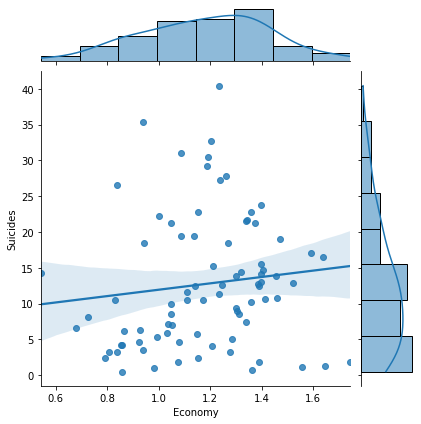

In [18]:
sns.jointplot(x="Economy", y="Suicides", data=df_final, kind="reg")
plt.show()

In [19]:
X = df_final[["Economy"]]
y = df_final[["Suicides"]]

In [20]:
reg = LinearRegression()
model = reg.fit(X,y)
print("Intercept: ", model.intercept_[0])
print("Coef: ", model.coef_[0][0])
print("Rscore: ", model.score(X, y))

Intercept:  7.491536730771211
Coef:  4.449015599416256
Rscore:  0.013790199598468389


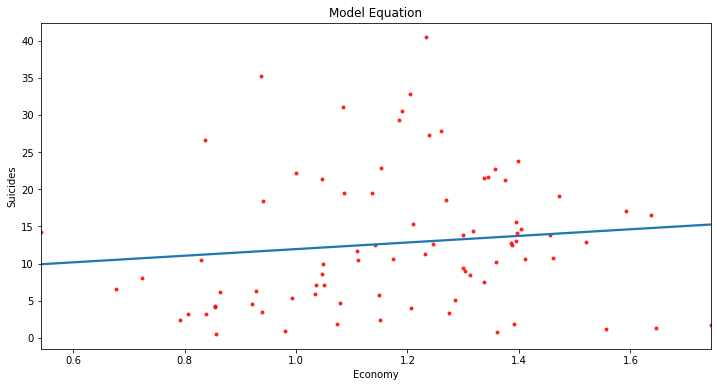

In [21]:
plt.figure(figsize=(12, 6))
g = sns.regplot(x=df_final["Economy"], y=df_final["Suicides"], ci=None, scatter_kws = {'color':'r','s':9})
g.set_title("Model Equation")
g.set_ylabel("Suicides")
g.set_xlabel("Economy")
plt.show()

In [22]:
gdb_list = [[0.25],[0.50],[0.75],[1.00],[1.25],[1.50]]
model.predict(gdb_list)
for g in gdb_list:
    print("La cantidad de suicidios de un pais con Economy GDP ", g[0], ": ", model.predict([g])[0][0])

La cantidad de suicidios de un pais con Economy GDP  0.25 :  8.603790630625275
La cantidad de suicidios de un pais con Economy GDP  0.5 :  9.716044530479339
La cantidad de suicidios de un pais con Economy GDP  0.75 :  10.828298430333403
La cantidad de suicidios de un pais con Economy GDP  1.0 :  11.940552330187467
La cantidad de suicidios de un pais con Economy GDP  1.25 :  13.052806230041531
La cantidad de suicidios de un pais con Economy GDP  1.5 :  14.165060129895595


In [23]:
def linear_reg(col, text, prdctn):
    
    sns.jointplot(x=col,y="Suicides", data=df_final, kind="reg")
    plt.show()
    
    X = df_final[[col]]
    y = df_final[["Suicides"]]
    reg = LinearRegression()
    model = reg.fit(X, y)
    
    # prediction
    plt.figure(figsize=(12, 6))
    g = sns.regplot(x=df_final[col], y=df_final["Suicides"], ci=None, scatter_kws = {'color':'r','s':9})
    g.set_title("Model Equation")
    g.set_ylabel("Suicides")
    g.set_xlabel(col)
    plt.show()
    
    print(text,": ", model.predict([[prdctn]])[0][0])

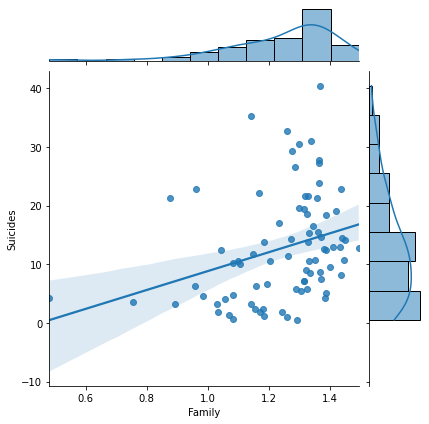

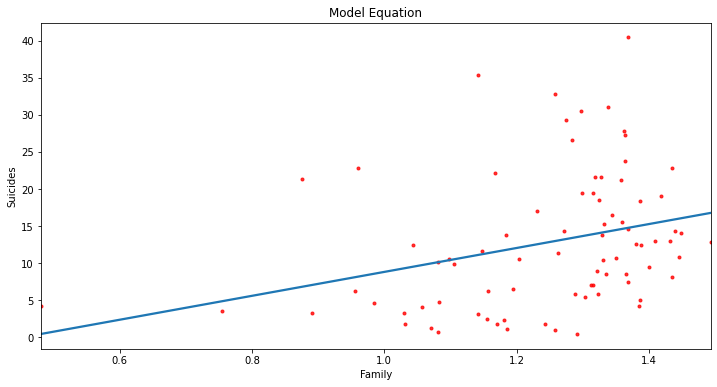

La cantidad de suicidios de un pais con Family 2 :  24.954207863846733


In [24]:
linear_reg("Family", "La cantidad de suicidios de un pais con Family 2", 2)

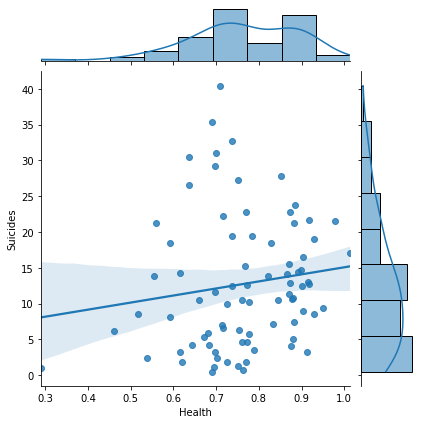

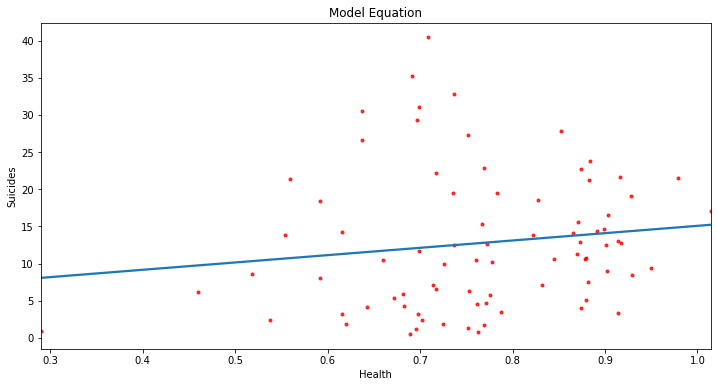

La cantidad de suicidios de un pais con Health 1.20 :  17.042199946268816


In [25]:
linear_reg("Health","La cantidad de suicidios de un pais con Health 1.20", 1.20)

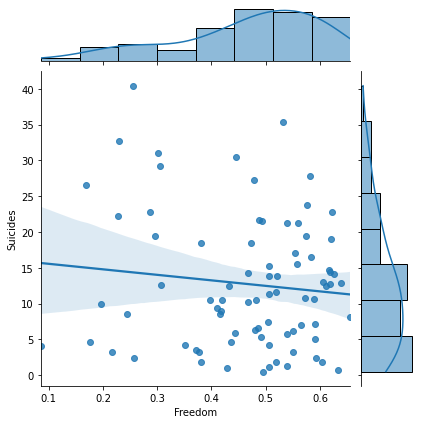

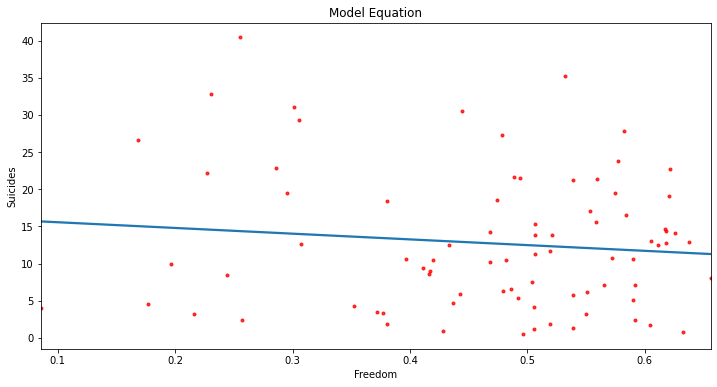

La cantidad de suicidios de un pais con Freedom 0.89 :  9.476691196246149


In [26]:
linear_reg("Freedom", "La cantidad de suicidios de un pais con Freedom 0.89", 0.89)

In [27]:
df = df_final.copy()
df = df.select_dtypes(include=["float64","int64"])

X = df.drop("Suicides", axis=1)
y = df["Suicides"]

lm = sms.OLS(y, X)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Suicides   R-squared (uncentered):                   0.731
Model:                            OLS   Adj. R-squared (uncentered):              0.702
Method:                 Least Squares   F-statistic:                              24.84
Date:                Thu, 20 May 2021   Prob (F-statistic):                    5.59e-18
Time:                        13:38:49   Log-Likelihood:                         -284.54
No. Observations:                  81   AIC:                                      585.1
Df Residuals:                      73   BIC:                                      604.2
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP_Capita    -0.3705      1.033     -0.359      0.721      -2.430       1.689
Economy        6.3713      7.212      0.883      0.380      -8.002      20.745
Family        23.2443      6.330      3.672      0.000      10.629      35.859
Health         8.6851     10.261      0.846      0.400     -11.764      29.135
Freedom       -4.5375     11.759     -0.386      0.701     -27.974      18.899
Trust          5.5410     12.913      0.429      0.669     -20.195      31.277
Generosity    -8.6594     10.739     -0.806      0.423     -30.062      12.743
Score         -4.2962      2.042     -2.104      0.039      -8.366      -0.226
==============================================================================
Omnibus:                        4.654   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.098   Jarque-Bera (JB):                4.295
Skew:                           0.564   Prob(JB):                        0.117
Kurtosis:                       3.045   Cond. No.                         104.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""